In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns

In [16]:
data = pd.read_csv("../data/suicidedataextrafestures.csv")\
    # .query('year >= 2015')

## Гипотеза №1
Зависимость кол-ва суицидов на единицу населения зависит от ВВП обратнопропорционально

Соберём данные о среднем количестве суицидов на 100к населения и среднем ВВП

In [17]:
data_by_country_gpd = data\
    .groupby(['country'], as_index=False)\
    .aggregate({'suicidesper100k': 'mean', 'GDPpyear': 'mean'})\
    .sort_values(axis=0, by='GDPpyear')

Из графика видно, что зависимости между этими двумя переменными нет

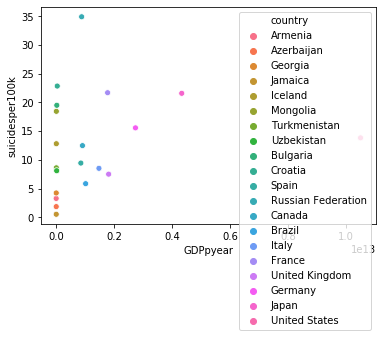

In [18]:
sns.scatterplot(x='GDPpyear',
                y='suicidesper100k',
                data=pd.concat([data_by_country_gpd.head(10), data_by_country_gpd.tail(10)]),
                hue='country'
                )

## Гипотеза 2
Зависимость кол-ва суицидов на единицу населения зависит от индекса прав обратнопропорционально

Соберём данные о среднем количестве суицидов на 100к населения и среднем значении индекса прав

In [19]:
data_by_country_hdi = data\
    .query('year >= 2012')\
    .groupby(['country'], as_index=False)\
    .aggregate({'suicidesper100k': 'mean', 'yearlyHDI': 'mean'})\
    .sort_values(axis=0, by='yearlyHDI')\
    .dropna()

Из графика видно, что зависимости между этими двумя переменными нет

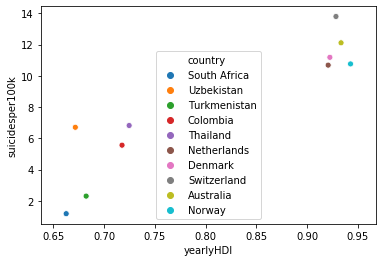

In [20]:
sns.scatterplot(x='yearlyHDI',
                y='suicidesper100k',
                data=pd.concat([data_by_country_hdi.head(5), data_by_country_hdi.tail(5)]),
                hue='country'
                )

## Гипотеза 3

Мужчины кончают жизнь самоубийством чаще женщин

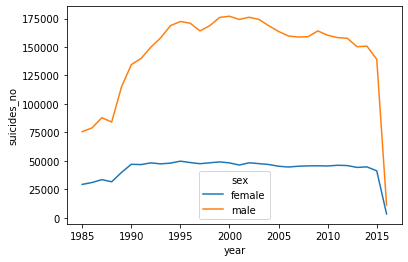

In [21]:
data_by_year_sex = data\
    .groupby(['year','sex'], as_index=False)\
    .aggregate({'suicides_no': 'sum'})
sns.lineplot(x='year', y='suicides_no', hue='sex', data=data_by_year_sex)